## **Financial Fraud Detection**

#### **importing the Packages and Libraies**

In [167]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from tqdm import tqdm

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch 
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torch.optim import Adam 
from sklearn.model_selection import train_test_split

from kaggle.api.kaggle_api_extended import KaggleApi
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
sns.set_style("white")
sns.set_theme("notebook")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Getting the data using kaggle API** 

In [169]:
# APi = KaggleApi()
# APi.authenticate()
# APi.dataset_download_files("eshummalik/securepay-credit-card-fraud-detection-data",path='.',unzip=True)

### **Data preprocessing**

In [170]:
df = pd.read_csv("creditcard.csv")
df.head(5).T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [171]:
df.shape

(284807, 31)

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [173]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [174]:
df.duplicated().sum()

np.int64(1081)

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
len(df.columns)

31

### **EDA**

<Axes: xlabel='Class', ylabel='count'>

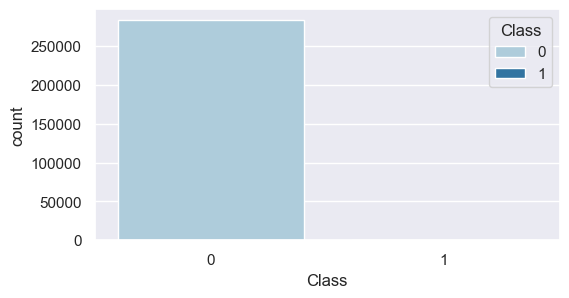

In [177]:
plt.figure(figsize=(6,3))
sns.countplot(x=df['Class'],hue=df['Class'],palette='Paired')


In [178]:
df['Class'].value_counts()
print('ratio of class fraud :', round(df['Class'].value_counts()[1]/df.shape[0],3))

ratio of class fraud : 0.002


we can see that hour data is dominated by the class 0 "not fraud" while the "fraud" class represents only than ``0.002`` , this means our data is unbanlanced so our strategie to fix this probelm is by using a Oversampling technique like the ``SMOTE`` 

#### **Data proccessing**

In [179]:
y_train.value_counts()

Class
0    198269
1    198269
Name: count, dtype: int64

In [180]:
class Prep_data():
    def __init__(self,dataframe):
        self.dataframe = dataframe
    
    def splitting_data_1(self):
        self.X = self.dataframe.iloc[:,:-1]
        self.y = self.dataframe.iloc[:,-1]
        return self.X , self.y 

    def splitting_data_2(self):
        self.x_train, x_temp, self.y_train, y_temp = train_test_split(
        self.X, self.y, test_size=0.3, random_state=42 )

        # Second split: temp → val (15%) and test (15%)
        self.x_val, self.x_test, self.y_val, self.y_test = train_test_split(
            x_temp, y_temp, test_size=0.5, random_state=42 )
        
        #applying the Smote 
        self.smote = SMOTE(sampling_strategy='minority',random_state=42)
        self.x_train , self.y_train = self.smote.fit_resample(self.x_train,self.y_train)


        #preprocessing
        self.scaler = StandardScaler()
        self.scaler.fit(self.x_train)
        

        self.x_train = self.scaler.transform(self.x_train)
        self.x_test = self.scaler.transform(self.x_test)
        self.x_val = self.scaler.transform(self.x_val)
        return self.x_train, self.y_train, self.x_test, self.y_test, self.x_val ,self.y_val

    def operations(self):
        self.splitting_data_1()
        return self.splitting_data_2()

In [181]:
prep = Prep_data(df)
x_train, y_train, x_val, y_val, x_test, y_test = prep.operations()

In [182]:
print('the shape of X_train :', x_train.shape ) 
print('the shape of y_train :',  y_train.shape )
print('the shape of X_test :', x_test.shape )
print('the shape of y_test :', y_test.shape )
print('the shape of X_val :', x_val.shape )
print('the shape of y_val :', y_val.shape )

the shape of X_train : (396538, 30)
the shape of y_train : (396538,)
the shape of X_test : (42559, 30)
the shape of y_test : (42559,)
the shape of X_val : (42559, 30)
the shape of y_val : (42559,)


In [183]:
class dataset(Dataset):
    def __init__(self,X,y):
        self.X = torch.tensor(np.array(X),dtype=torch.float32).to(device)
        self.y = torch.tensor(np.array(y),dtype=torch.float32).to(device).unsqueeze(1) 

    def __len__(self):
        return len(self.X)

    def __getitem__(self,idx):
        return self.X[idx] , self.y[idx]

In [184]:
train_data = dataset(x_train ,y_train )
test_data = dataset(x_test ,y_test)
val_data = dataset(x_val ,y_val)

In [185]:
x_train.shape

(396538, 30)

#### **setting the hyperparametres**

In [186]:
Batch_size = 16 
train_loader = DataLoader(train_data,batch_size=Batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size=Batch_size,shuffle=True)
val_loader = DataLoader(val_data,batch_size=Batch_size,shuffle=True)

#### **Building the model** 

In [187]:
x_train.shape[1]

30

In [188]:
Lr = 1e-4

class Model_classifier(nn.Module):
    def __init__(self, input_dim=x_train.shape[1], hidden_dim=16,dropout_rate=.5):
        super(Model_classifier,self).__init__()
        self.input_layer = nn.Linear(input_dim,hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()
        self.output_layer= nn.Linear(hidden_dim,1)

        nn.init.xavier_uniform_(self.input_layer.weight)
        nn.init.xavier_uniform_(self.output_layer.weight)

    def forward(self,x):
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x 

model = Model_classifier().to(device)
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = Adam(model.parameters(),lr=Lr,weight_decay=1e-4)

#### **building the training loop**

  0%|          | 0/25 [00:00<?, ?it/s]


NameError: name 'a' is not defined

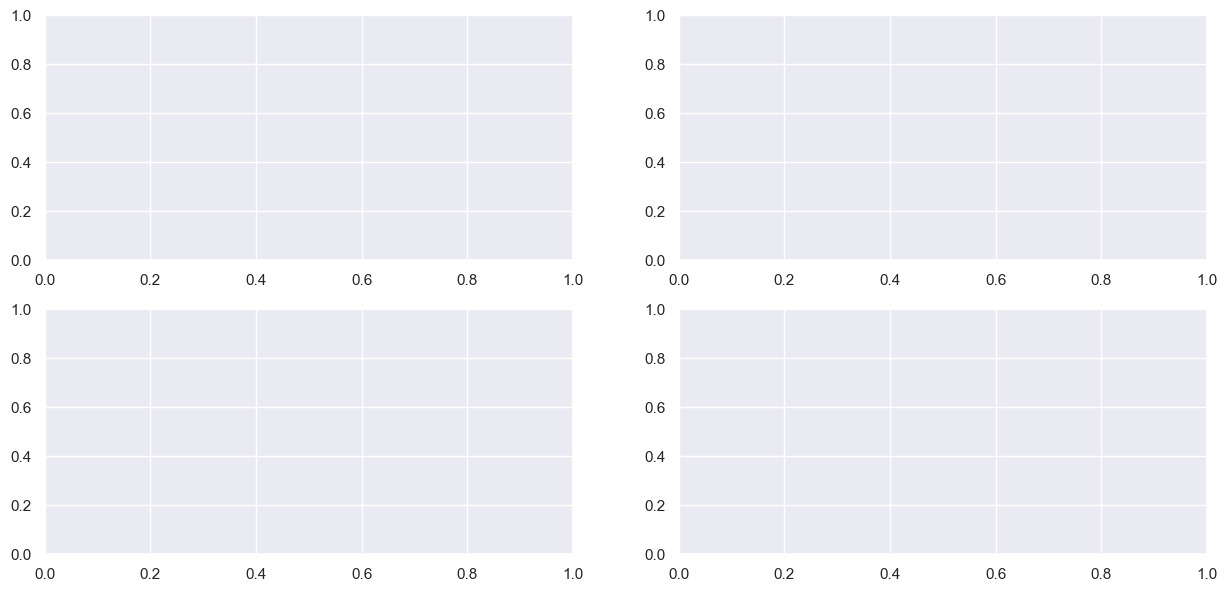

In [ ]:
epochs = 25 
# storing the model training metrics 
list_train_loss = []
list_train_acc = []
list_val_loss = []
list_val_acc = []

# plotting the metrics 
fig , ax = plt.subplots(2,2,figsize=(15,7))
ax = ax.flatten()

for ep in tqdm(range(epochs)):
    model.train()

    # accumlating the epochs lvl accuracy and loss 
    ep_train_loss = 0 
    ep_train_acc = 0 
    ep_val_loss = 0
    ep_val_acc  = 0
    
    for  X, y in train_loader:
        y_hat = model(X)
        #getting the loss
        loss = loss_fn(y_hat,y)
        ep_train_loss += loss.item()

        #getting the accuracy
        y_prob = torch.sigmoid(y_hat)
        pred = (y_prob > .5).float()
        acc = ( pred == y).sum().item()
        ep_train_acc += acc

    # loss optimisation 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #Validation the model 
    model.eval()
    with torch.inference_mode():

        for  X, y in val_loader:

            y_hat = model(X)
            #getting the loss
            loss = loss_fn(y_hat,y)
            ep_val_loss += loss.item()
            #getting the accuracy
            y_prob = torch.sigmoid(y_hat)
            pred = (y_prob > 0.5).float()
            acc = (pred  == y).sum().item()
            ep_val_acc += acc
            
    list_train_loss.append(round(ep_train_loss,4))
    list_train_acc.append(round((ep_train_acc/len(train_data))*100,4))
    list_val_loss.append(round(ep_val_loss,4))
    list_val_acc.append(round((ep_val_acc/len(val_data))*100,4))

    ax[0].clear()
    ax[0].plot(list_train_loss, label='Train Loss',marker='o',c='r')
    ax[0].set_xlim(0, epochs)
    ax[0].legend()
    ax[0].set_title(' Train Loss')

    ax[1].clear()
    ax[1].plot(list_train_acc, label='Train Acc',marker='o',c='r')
    ax[1].set_xlim(0, epochs)
    ax[1].set_ylim(0, 100)
    ax[1].legend()
    ax[1].set_title('Train Accuracy')

    ax[2].clear()
    ax[2].plot(list_val_loss, label='Val Loss',marker='*',c='b')
    ax[2].set_xlim(0, epochs)
    ax[2].legend()
    ax[2].set_title('val Loss')

    ax[3].clear()
    ax[3].plot(list_val_acc, label='Val Acc',marker='*',c='b')
    ax[3].set_xlim(0, epochs)
    ax[3].set_ylim(0, 100)
    ax[3].legend()
    ax[3].set_title('val Accuracy')

    plt.tight_layout()
    clear_output(wait=True)
    display(fig)

    print(f'epochs : {ep} | training loss : {round(ep_train_loss,4)} | training accuracy : {round((ep_train_acc/len(train_data))*100,4)} | val loss : {round(ep_val_loss,4)} | val accuracy {round((ep_val_acc / len(val_data))*100,4) }')